# YouTube Tutorial: data analytics with Pandas

Advanced Topics on Machine Learning - Seattle - Quentin Caudron - https://www.youtube.com/watch?v=F7sCL61Zqss

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/QCaudron/pydata_pandas/master/data/coffees.csv")

In [3]:
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


## Clean data

In [4]:
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

It's a string, fix

In [5]:
print(len(data))

671


In [6]:
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-07-26 11:39:00,12358.0,Quentin
freq,1,2,367


In [7]:
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


In [8]:
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

### Seeing what's in timestamp column, cleaning the data

In [9]:
print(type(data.timestamp[0]))  # Need to fix this

<class 'str'>


Above happened because timestamp was read from CSV as a string.

PROBLEMS:

-timestamp column contains strings that need to be datetimes

-coffees column contains some null values, at least one string

### Taking out non-numeric values, converting to numeric

In [10]:
data.coffees = pd.to_numeric(data.coffees, errors='coerce')  # Parses NaN's, not 'testing'

In [11]:
data.dtypes

timestamp       object
coffees        float64
contributor     object
dtype: object

In [12]:
data.dropna(inplace=True)
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


### Convert coffees series to integer, timestamp to datetime

In [13]:
data.coffees = data.coffees.astype(int)
data.dtypes

timestamp      object
coffees         int32
contributor    object
dtype: object

In [14]:
data.timestamp = pd.to_datetime(data.timestamp)
data.dtypes

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

In [15]:
data.index  # Shows dropped indices

Int64Index([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            661, 662, 663, 664, 665, 666, 667, 668, 669, 670],
           dtype='int64', length=657)

In [16]:
data.describe(include='all')

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


In [17]:
data.iloc[:5]

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


In [18]:
data[:5]

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


In [19]:
data.dtypes

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

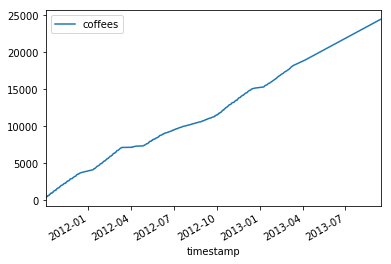

In [20]:
data.plot(x=data.timestamp)

In [21]:
data.tail(10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


In [22]:
data = data[data.timestamp < "2013-03-01"]
data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


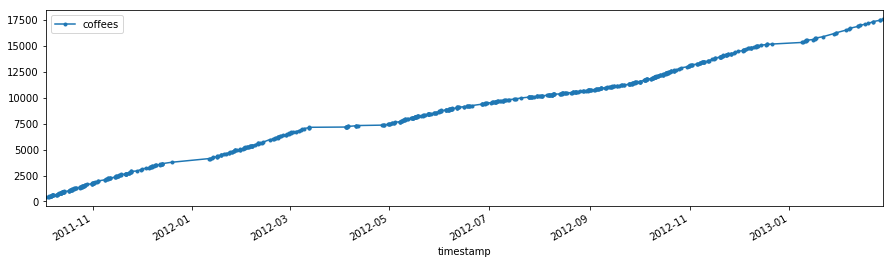

In [23]:
data.plot(x=data.timestamp, figsize=(15,4), style='.-')

## Contributions to time-series

In [24]:
data.contributor.value_counts()

Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

### Plot contributor value_counts to see who contributed the most

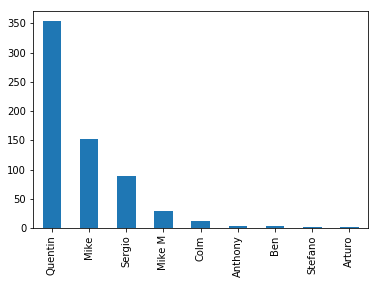

In [25]:
data.contributor.value_counts().plot(kind='bar')

In [26]:
# Create a series of the weekdays
# for each entry using .dt.weekday
weekdays = data.timestamp.dt.weekday
data = data.assign(weekdays=weekdays)

In [29]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_dict = {key: weekday_names[key] for key in range(7)}

def day_of_week(idx):
    return weekday_dict[idx]

# Use .apply() to apply a custoom function in weekdays column
data.weekdays = data.weekdays.apply(day_of_week)

data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


In [45]:
weekday_counts = data.groupby('weekdays').count()
weekday_counts = weekday_counts.loc[weekday_names]

weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


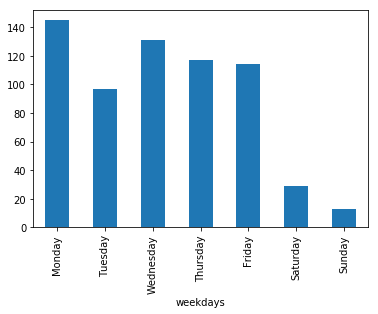

In [48]:
weekday_counts.coffees.plot(kind='bar')

In [52]:
data.index = data.timestamp
data.index

DatetimeIndex(['2011-10-03 08:22:00', '2011-10-04 11:48:00',
               '2011-10-05 10:47:00', '2011-10-05 13:15:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               '2011-10-06 12:14:00', '2011-10-06 12:49:00',
               '2011-10-06 14:52:00', '2011-10-07 07:34:00',
               ...
               '2013-02-12 08:36:00', '2013-02-12 11:39:00',
               '2013-02-13 13:58:00', '2013-02-16 11:55:00',
               '2013-02-18 13:46:00', '2013-02-21 13:44:00',
               '2013-02-21 15:02:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', name='timestamp', length=646, freq=None)

In [55]:
data.drop(['timestamp'], axis=1, inplace=True)

In [57]:
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


In [59]:
midnights = pd.date_range(data.index[0], data.index[-1], fred='D', normalize=True)
midnights

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

In [61]:
new_index = midnights.union(data.index)

new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

In [69]:
upsampled_data = data.reindex(new_index)
# interpolate upsampled data using time method

upsampled_data = upsampled_data.interpolate(method='time')
upsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Monday
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tuesday
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wednesday
2011-10-05 13:15:00,481.000000,Quentin,Wednesday
2011-10-06 00:00:00,494.066298,NaN,NaN
2011-10-06 07:21:00,503.000000,Anthony,Thursday
2011-10-06 10:04:00,513.000000,Quentin,Thursday


In [75]:
# .resample() followed by .asfreq()
daily_data = upsampled_data.resample('D').asfreq()
daily_data = daily_data.drop(['contributor'], axis=1)
daily_data['weekdays'] = daily_data.index.weekday_name
daily_data.head()

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,404.408262,Tuesday
2011-10-05,438.664249,Wednesday
2011-10-06,494.066298,Thursday
2011-10-07,572.844311,Friday


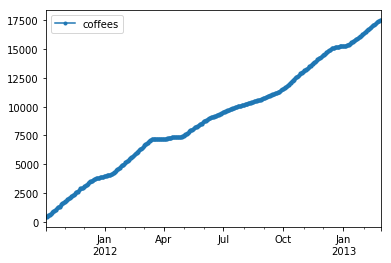

In [78]:
daily_data.plot(style='.-')

In [83]:
# use .diff() on coffees column; follow with .shift()

coffees_made = daily_data.coffees.diff().shift(-1)
daily_data['coffees_made_today'] = coffees_made

daily_data.head(10)

,coffees,weekdays,coffees_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,404.408262,Tuesday,34.255987
2011-10-05,438.664249,Wednesday,55.402049
2011-10-06,494.066298,Thursday,78.778013
2011-10-07,572.844311,Friday,64.392941
2011-10-08,637.237253,Saturday,7.492196
2011-10-09,644.729448,Sunday,8.195209
2011-10-10,652.924658,Monday,81.648549
2011-10-11,734.573206,Tuesday,46.351008
2011-10-12,780.924214,Wednesday,71.254295


In [86]:
coffees_by_day = daily_data.groupby('weekdays').mean()

coffees_by_day

,coffees,coffees_made_today
weekdays,,
Friday,9041.387848,34.138034
Monday,9107.593954,37.802404
Saturday,9075.525882,16.299858
Sunday,9091.825740,15.768215
Thursday,8997.887023,43.500824
Tuesday,9027.274897,39.132964
Wednesday,9066.407862,47.640057


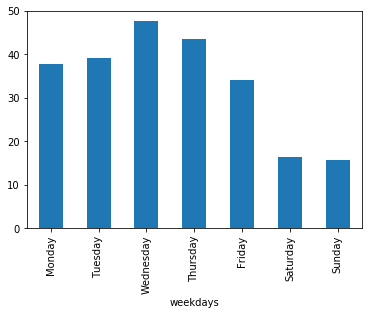

In [89]:
coffees_by_day = coffees_by_day.loc[weekday_names]
coffees_by_day.coffees_made_today.plot(kind='bar')

In [ ]:
people = 